In [1]:
#### Extracting MFCC's For every audio file
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import librosa
from glob import glob
from google.colab import drive
drive.mount('/content/gdrive')

audio_dataset_path='/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/'
metadata=pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/patient_diagnosis_1.csv')
metadata

Mounted at /content/gdrive


,Unnamed: 0,patient_Id,Disease,FileName
0,0,160,COPD,160_1b3_Lr_mc_AKGC417L.wav
1,1,160,COPD,160_1b2_Tc_mc_AKGC417L.wav
2,2,160,COPD,160_1b3_Pl_mc_AKGC417L.wav
3,3,160,COPD,160_1b3_Tc_mc_AKGC417L.wav
4,4,160,COPD,160_1b4_Lr_mc_AKGC417L.wav
...,...,...,...,...
915,915,160,COPD,160_1b2_Ar_mc_AKGC417L.wav
916,916,160,COPD,160_1b2_Al_mc_AKGC417L.wav
917,917,159,Healthy,159_1b1_Pr_sc_Meditron.wav
918,918,160,COPD,160_1b3_Ar_mc_AKGC417L.wav


In [2]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')
print("No. of audio files in taken dataset is",len(files))

No. of audio files in taken dataset is 920


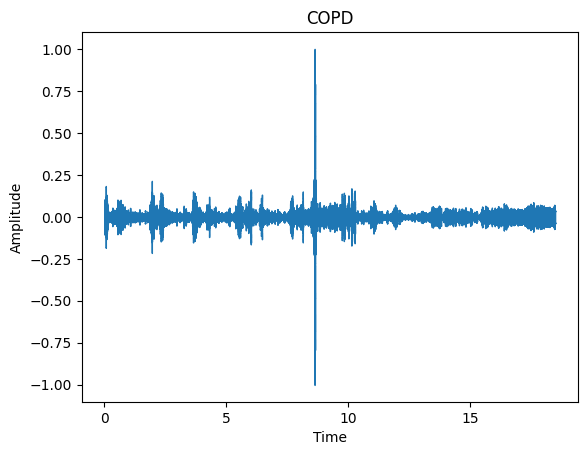

<Figure size 1200x400 with 0 Axes>

In [3]:
y, sr = librosa.load(files[0])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("COPD")
plt.figure(figsize=(12, 4))
plt.show()

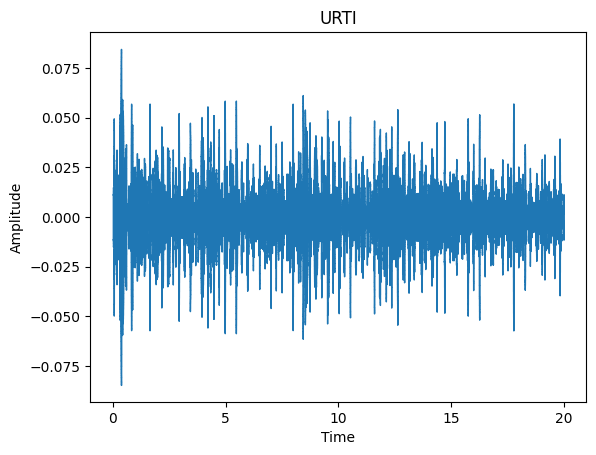

<Figure size 1200x400 with 0 Axes>

In [4]:
y, sr = librosa.load(files[51])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("URTI")
plt.figure(figsize=(12, 4))
plt.show()

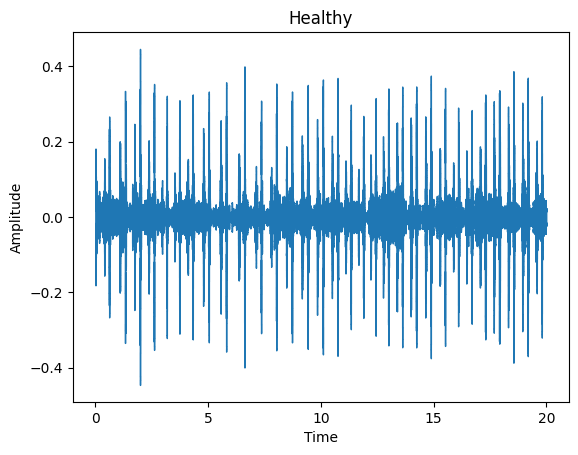

<Figure size 1200x400 with 0 Axes>

In [5]:
y, sr = librosa.load(files[40])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Healthy")
plt.figure(figsize=(12, 4))
plt.show()

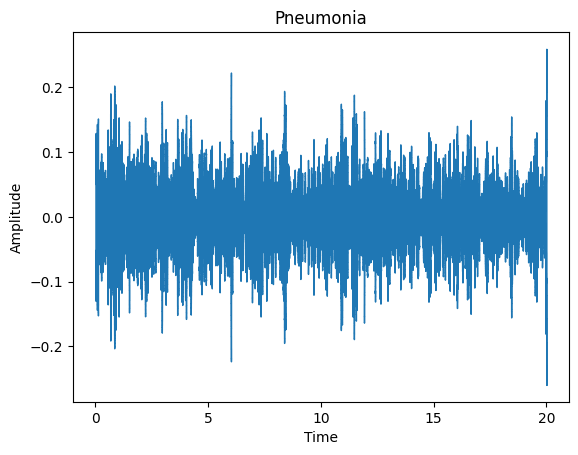

<Figure size 1200x400 with 0 Axes>

In [6]:
y, sr = librosa.load(files[55])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Pneumonia")
plt.figure(figsize=(12, 4))
plt.show()

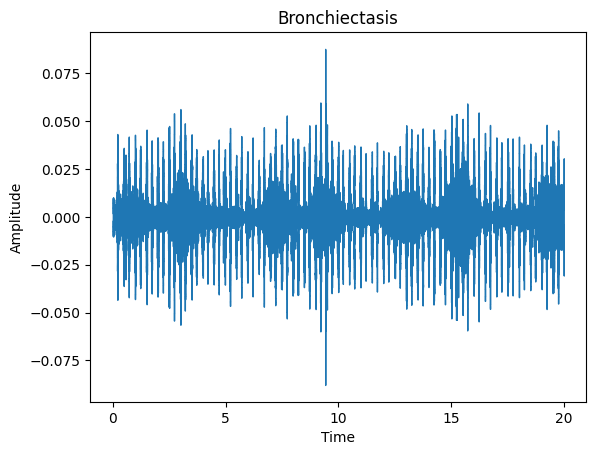

<Figure size 1200x400 with 0 Axes>

In [7]:
y, sr = librosa.load(files[52])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Bronchiectasis")
plt.figure(figsize=(12, 4))
plt.show()

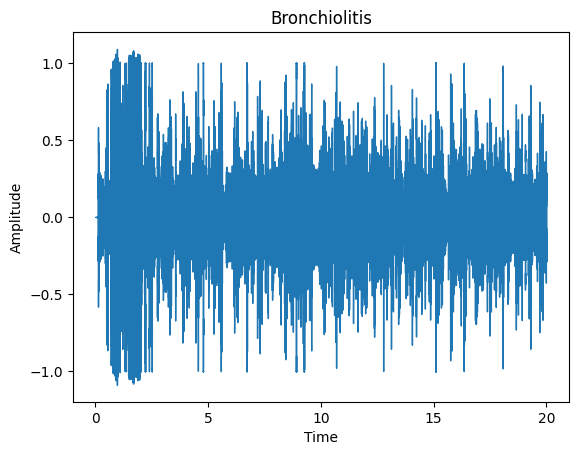

<Figure size 1200x400 with 0 Axes>

In [8]:
y, sr = librosa.load(files[224])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Bronchiolitis")
plt.figure(figsize=(12, 4))
plt.show()

In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [10]:
import numpy as np
from tqdm import tqdm
data = []
# final_class_labels = []
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path,str(row["FileName"]))
    # final_class_labels = row["Disease"]
    data.append(features_extractor(file_name))
    # extracted_features.append([data,final_class_labels])

920it [02:07,  7.24it/s]


In [11]:
df = pd.DataFrame(data)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-350.295166,97.178185,77.049088,56.454502,39.910183,28.304533,21.135487,17.349165,15.320764,13.873403,...,1.051151,0.879285,0.744374,0.700323,0.718066,0.826544,0.943023,1.035765,1.065833,1.019794
1,-299.680298,127.897171,46.587223,27.426277,32.336712,29.447641,21.253862,14.247361,12.528389,14.088763,...,1.576840,2.358721,2.173096,1.178458,1.052596,1.967756,2.719148,1.436073,-0.696693,-0.208386
2,-388.234619,104.584793,50.404076,44.282291,31.175829,28.736917,21.662169,19.746120,14.553826,13.583982,...,1.900735,3.014789,2.475592,2.764455,2.241044,2.680442,2.247488,2.467751,1.392687,1.745624
3,-277.744049,147.344849,55.125916,24.791193,31.462868,30.049179,18.900990,10.995044,10.040893,12.667876,...,2.224210,3.632589,2.879391,1.270702,1.160187,2.072255,2.044492,0.335398,-1.183670,-0.284111
4,-363.610352,90.640335,73.752518,55.409008,39.732201,28.729019,22.285254,18.880713,16.886374,15.181063,...,1.459948,1.400367,1.354774,1.291005,1.281866,1.290259,1.201254,1.036850,0.921921,0.876532


In [13]:
list_1 = []
for i in metadata['Disease']:
  list_1.append(i)

In [14]:
labels = []
to_hot_one = {"COPD":0, "Healthy":1, "URTI":2, "Bronchiectasis":3, "Pneumonia":4, "Bronchiolitis":5, "Asthma":6, "LRTI":7}
for i in list_1:
  labels.append(to_hot_one[i])

In [15]:
df['Disease_Id'] = labels

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-350.295166,97.178185,77.049088,56.454502,39.910183,28.304533,21.135487,17.349165,15.320764,13.873403,...,0.879285,0.744374,0.700323,0.718066,0.826544,0.943023,1.035765,1.065833,1.019794,0
1,-299.680298,127.897171,46.587223,27.426277,32.336712,29.447641,21.253862,14.247361,12.528389,14.088763,...,2.358721,2.173096,1.178458,1.052596,1.967756,2.719148,1.436073,-0.696693,-0.208386,0
2,-388.234619,104.584793,50.404076,44.282291,31.175829,28.736917,21.662169,19.746120,14.553826,13.583982,...,3.014789,2.475592,2.764455,2.241044,2.680442,2.247488,2.467751,1.392687,1.745624,0
3,-277.744049,147.344849,55.125916,24.791193,31.462868,30.049179,18.900990,10.995044,10.040893,12.667876,...,3.632589,2.879391,1.270702,1.160187,2.072255,2.044492,0.335398,-1.183670,-0.284111,0
4,-363.610352,90.640335,73.752518,55.409008,39.732201,28.729019,22.285254,18.880713,16.886374,15.181063,...,1.400367,1.354774,1.291005,1.281866,1.290259,1.201254,1.036850,0.921921,0.876532,0


In [ ]:
# df.to_csv('extracted_features_df_1.csv', index = False)